In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./test_images/straight_lines1.jpg')

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [3]:
gray.shape

(720, 1280)

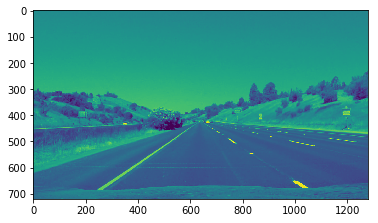

In [4]:
plt.imshow(gray)
plt.show()

In [5]:
copy = gray.copy()

bottom_left = (190, 720)
top_left = (585, 455) #(585, 455) (580, 460)
top_right = (705, 455) #(705, 455) (700, 460)
bottom_right = (1130, 720) #(1130, 720) (1110, 720)

color = [255, 0, 0]
w = 2
cv2.line(copy, bottom_left, top_left, color, w)
cv2.line(copy, top_left, top_right, color, w)
cv2.line(copy, top_right, bottom_right, color, w)
cv2.line(copy, bottom_right, bottom_left, color, w)
fig, ax = plt.subplots(figsize=(30, 15))
ax.imshow(copy)

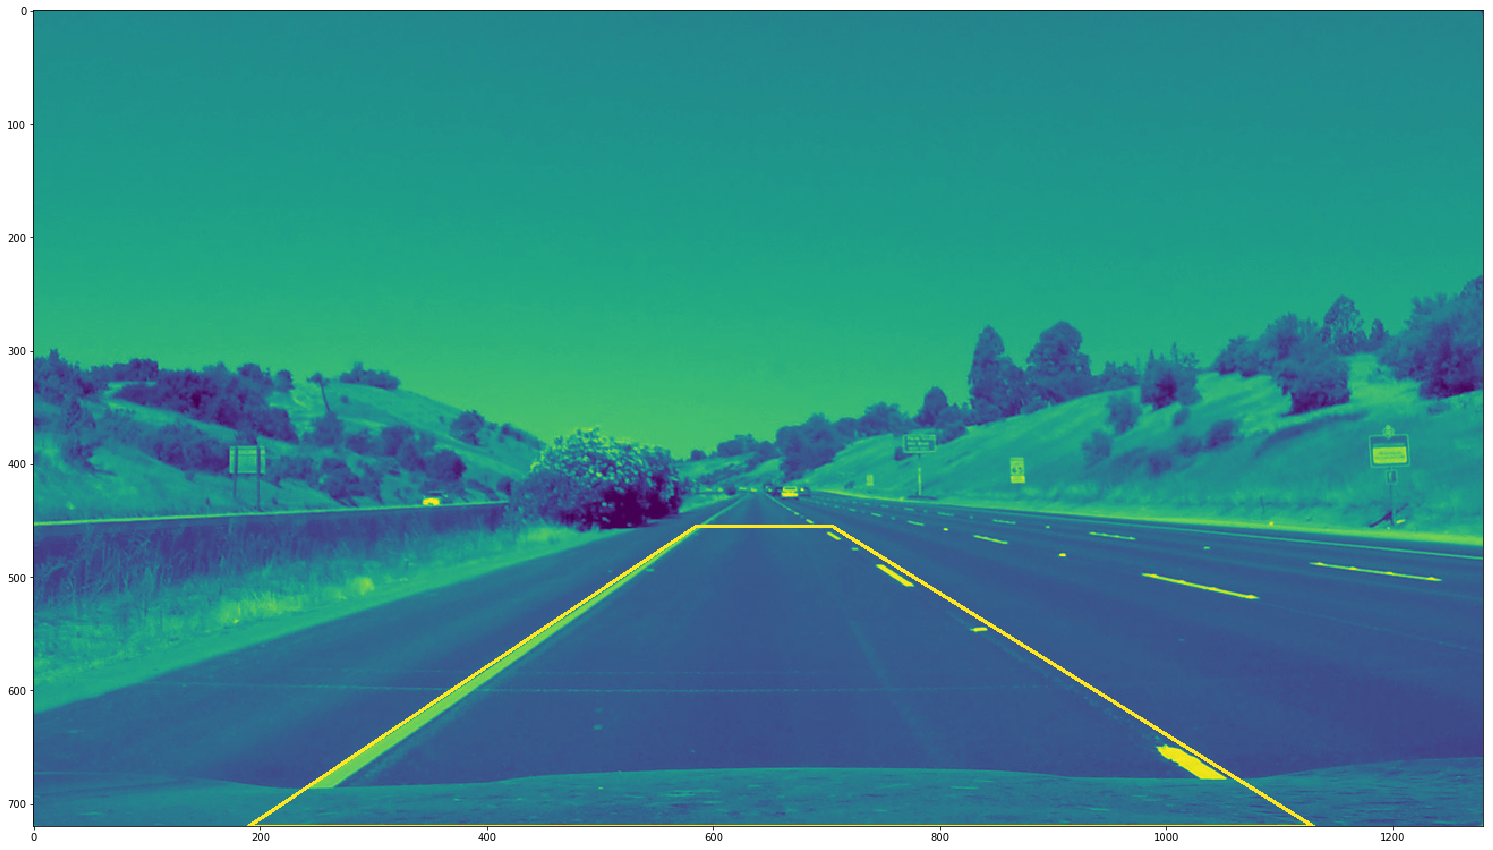

In [6]:
plt.show()

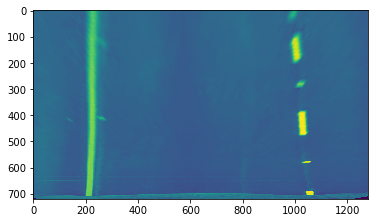

In [7]:
src = np.float32([ top_left, top_right, bottom_right, bottom_left])
img_size = (gray.shape[1], gray.shape[0])
offset = 200
dst = np.float32([
    [offset, 0],
    [img_size[0]-offset, 0],
    [img_size[0]-offset, img_size[1]], 
    [offset, img_size[1]]
])

M = cv2.getPerspectiveTransform(src, dst)
warped = cv2.warpPerspective(gray, M, img_size)
plt.imshow(warped)
plt.show()

In [8]:
img = mpimg.imread('./test_images/test3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

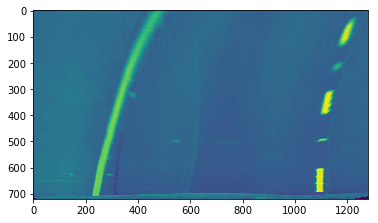

In [9]:
warped = cv2.warpPerspective(gray, M, img_size)
plt.imshow(warped)
plt.show()

In [10]:
Minv = cv2.getPerspectiveTransform(dst, src)

In [11]:
import pickle
pickle.dump( { 'M': M, 'Minv': Minv }, open('./perspective_transform.p', 'wb'))